# Stimulus-specific bias function

Visualization of stimulus-specific bias functions across participants for Supplementary Figure 2.

In [1]:
import sys
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
from src import utils
utils.setup_matplotlib()

In [2]:
utils.download_dataset("data/outputs/behavior")
utils.download_dataset("data/processed/behavior")

with open("../data/outputs/behavior/results_stimulus_specific_bias.pickle", 'rb') as f:
    results = pickle.load(f)

behavior  = pd.read_csv("../data/processed/behavior/behavior.csv")
behavior = behavior[(~np.isnan(behavior['choice'])) & (~np.isnan(behavior['error']))]

downloading data/outputs/behavior...
data/outputs/behavior already exists. Skipping download...
downloading data/processed/behavior...
data/processed/behavior already exists. Skipping download...


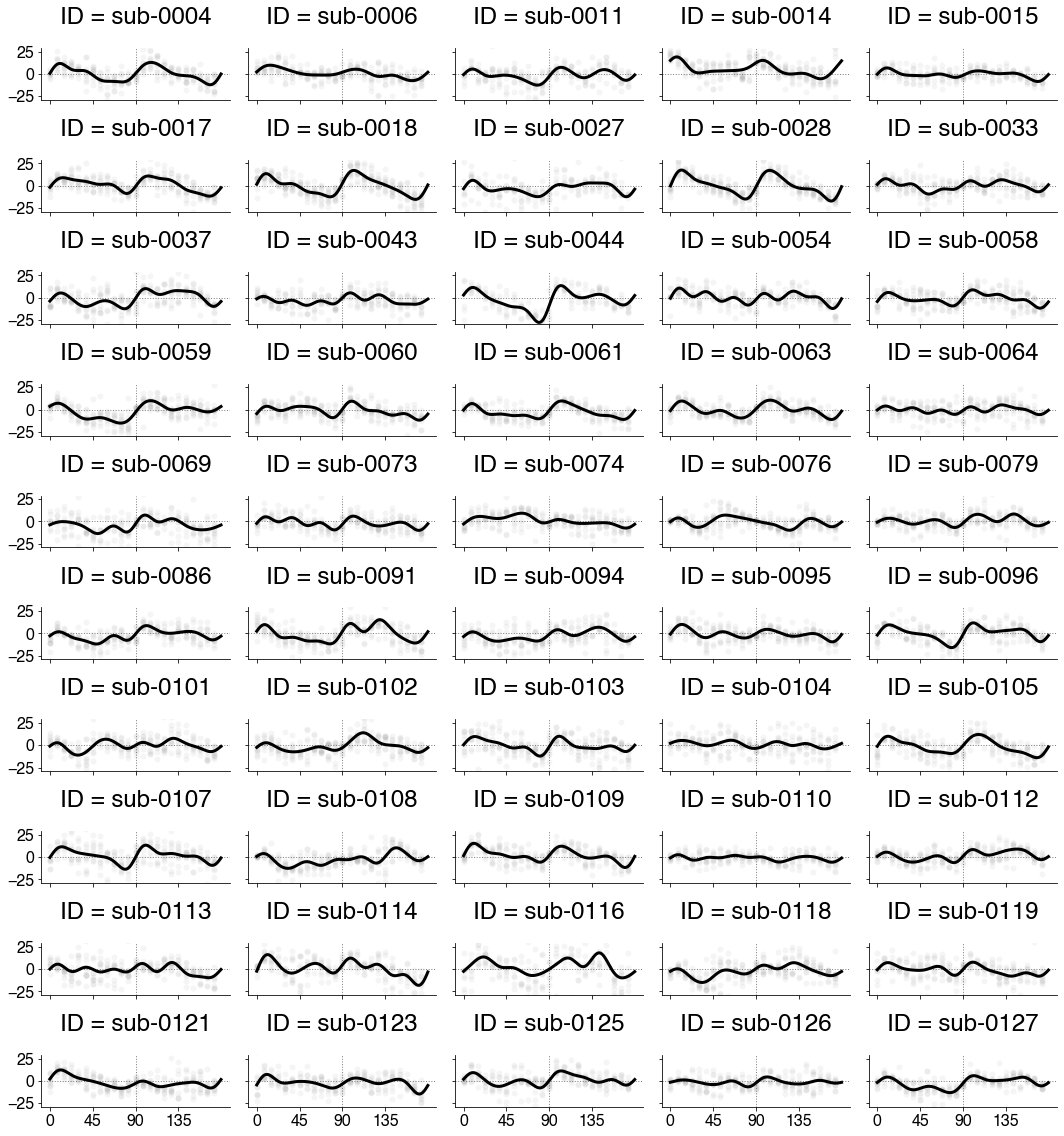

In [3]:
# plot the fitted stimulus-specific bias functions
sub_list  = np.sort(behavior.ID.unique())
stim_list = np.sort(behavior.stim.unique())
x_resolve = np.linspace(0,180,num=500,endpoint=False)
fig, ax   = plt.subplots(nrows=10, ncols=5, sharex=True, sharey=True, figsize=[15,16])

for i_id, v_id in enumerate(sub_list):
    i, j      = divmod(i_id, 5)
    sub_behav = behavior[behavior.ID == v_id]
    
    ax[i,j].axvline(x=90, linestyle='dotted', color='gray', linewidth=1.)
    ax[i,j].axhline(y=0,  linestyle='dotted', color='gray', linewidth=1.)

    for i_s, v_s in enumerate(stim_list): 
        sub_error = sub_behav.error[sub_behav.stim==v_s]
        ax[i,j].scatter([v_s]*len(sub_error), sub_error, alpha=0.08, color='gray', linewidth=0)

    y_resolve = utils.stimulus_specific_bias(x_resolve, results['weights'][v_id], **results['info'])
    ax[i,j].plot(x_resolve, y_resolve, linewidth=3, color='k')
    ax[i,j].set_title("ID = sub-{:04d}".format(v_id))
    ax[i,j].set_xticks([0,45,90,135])
    ax[i,j].set_ylim([-29,29])
    
plt.tight_layout()
plt.show()